In [1]:
import numpy as np
import scipy.sparse as sps
import scipy.linalg as spl
import scipy.sparse.linalg as spsl

#%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

from scipy.special import legendre

import time
from tools import dat_to_xarray

# Ekman = 1e-5

In [3]:
picked = dat_to_xarray("data/data800/picked_mode.dat")
layered_l = dat_to_xarray("data/data800/sph_pwr_layer_l.dat")
layered_s = dat_to_xarray("data/data800/sph_pwr_layer_s.dat")

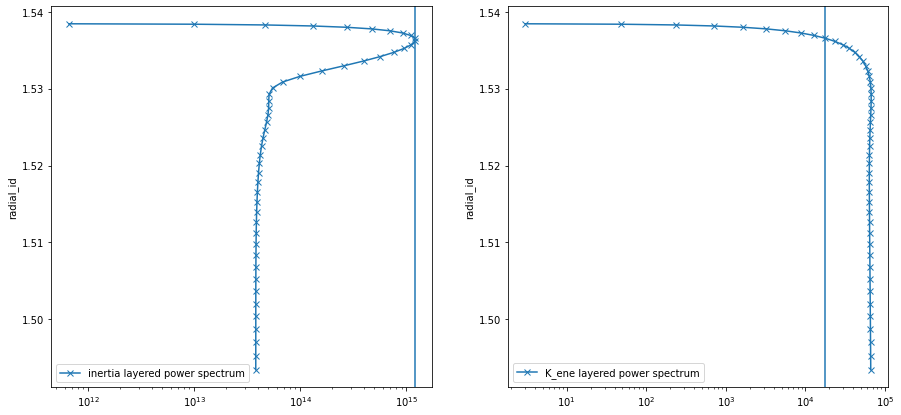

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
for i,var in enumerate(['inertia','K_ene']):
    ax[i].plot(layered_s[var].isel(radial_id=slice(-50,-1)).mean('t_step').squeeze(),picked.radius[-50:-1],'-x',label=var + " layered power spectrum")
    ax[i].axvline(layered_s[var].isel(radial_id=350).mean('t_step').squeeze())
    ax[i].set_ylabel('radial_id')
    ax[i].legend()
    ax[i].set_xscale('log')


In [27]:
K_ene_layerbase = layered_s["K_ene"].isel(radial_id=slice(-50,-40)).mean().data
U_estimate = np.sqrt(2*K_ene_layerbase)

In [28]:
U_estimate

361.3261507336926

Reynolds = $\dfrac{U^*\delta^*}{\nu} = \dfrac{U\frac{\nu}{\bar L} \delta\bar{L}}{\nu} =U\delta$ 

$L \simeq 0.01$, so Re $\simeq 4$

A better estimate of $\delta$ is $\sqrt{2 \nu / f} = \sqrt{2 Ek} = \sqrt{2 10^{-5}} = 0.004$, then $Re=1.6$

In [31]:
U_estimate*np.sqrt(2e-5)

1.6158996701777444

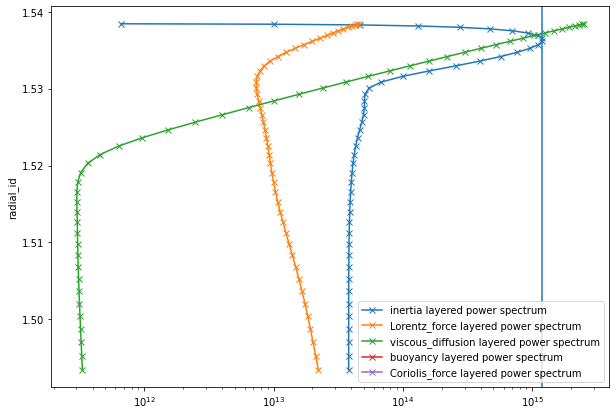

In [5]:
fig,ax=plt.subplots(1,1,figsize=(10,7))
for i,var in enumerate(['inertia','Lorentz_force','viscous_diffusion','buoyancy','Coriolis_force']):
    ax.plot(layered_s[var].isel(radial_id=slice(-50,-1)).mean('t_step').squeeze(),picked.radius[-50:-1],'-x',label=var + " layered power spectrum")
    
    ax.set_ylabel('radial_id')
    ax.legend()
    ax.set_xscale('log')
ax.axvline(layered_s['inertia'].isel(radial_id=350).mean('t_step').squeeze())

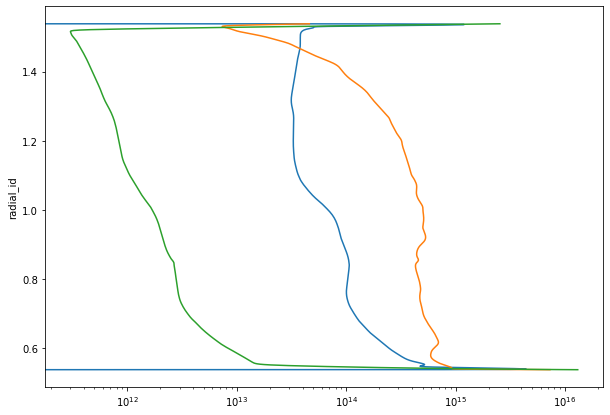

In [37]:
fig,ax=plt.subplots(1,1,figsize=(10,7))
for i,var in enumerate(['inertia','Lorentz_force','viscous_diffusion']):
    ax.plot(layered_s[var].mean('t_step').squeeze(),picked.radius,label=var + " layered power spectrum")
    #ax.axvline(layered_s[var].isel(radial_id=350).mean('t_step').squeeze())
    ax.set_ylabel('radial_id')
    #ax.legend()
    ax.set_xscale('log')


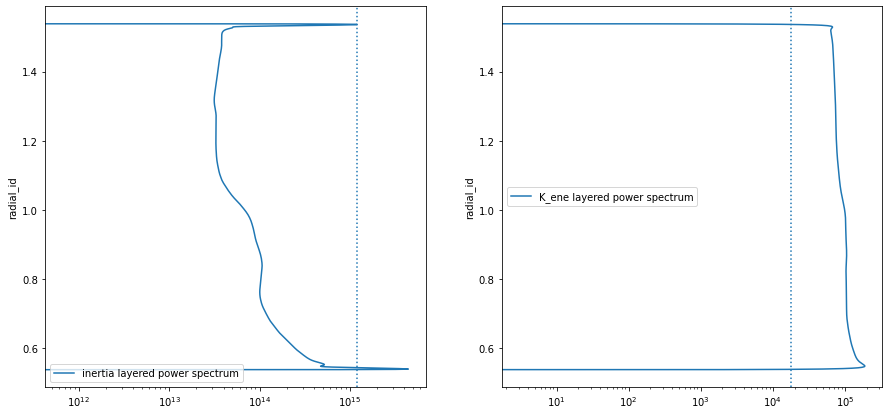

In [40]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
for i,var in enumerate(['inertia','K_ene']):
    ax[i].plot(layered_s[var].mean('t_step').squeeze(),picked.radius,label=var + " layered power spectrum")
    ax[i].axvline(layered_s[var].isel(radial_id=350).mean('t_step').squeeze(),linestyle='dotted')
    ax[i].set_ylabel('radial_id')
    ax[i].legend()
    ax[i].set_xscale('log')


# Temporal Fourier spectra

In [48]:
10**13/86400/365

317097.9198376459

In [28]:
0.7292
2*np.pi/86400

7.27220521664304e-05

In [29]:
365*86400

31536000

In [ ]:
# Period = -20 yrs = -20*365*86400 s
# Nondim timescale = L^2/nu = 1/EK/Omega = 1/86400 * 1e5 ~ 1

In [26]:
layered_s.time

<xarray.DataArray 'time' (t_step: 2)>
array([7.81502, 7.81504])
Coordinates:
  * t_step   (t_step) int64 16000200 16000400
    time     (t_step) float64 7.815 7.815

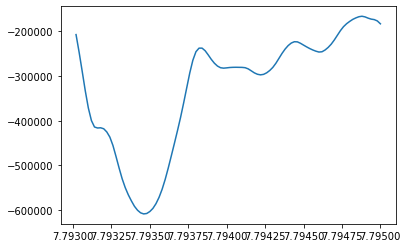

In [33]:
plt.plot(picked789.time,picked789.inertia_pol.isel(radius_ID=2).sel(degree=3).squeeze())

172800.00043086827

In [43]:
np.fft.rfftfreq(len(picked789.time),(picked789.time[1]-picked789.time[0]).data/(1e-5/86400))

array([0.00000000e+00, 5.78703702e-08, 1.15740740e-07, 1.73611111e-07,
       2.31481481e-07, 2.89351851e-07, 3.47222221e-07, 4.05092592e-07,
       4.62962962e-07, 5.20833332e-07, 5.78703702e-07, 6.36574072e-07,
       6.94444443e-07, 7.52314813e-07, 8.10185183e-07, 8.68055553e-07,
       9.25925924e-07, 9.83796294e-07, 1.04166666e-06, 1.09953703e-06,
       1.15740740e-06, 1.21527777e-06, 1.27314814e-06, 1.33101852e-06,
       1.38888889e-06, 1.44675926e-06, 1.50462963e-06, 1.56250000e-06,
       1.62037037e-06, 1.67824074e-06, 1.73611111e-06, 1.79398148e-06,
       1.85185185e-06, 1.90972222e-06, 1.96759259e-06, 2.02546296e-06,
       2.08333333e-06, 2.14120370e-06, 2.19907407e-06, 2.25694444e-06,
       2.31481481e-06, 2.37268518e-06, 2.43055555e-06, 2.48842592e-06,
       2.54629629e-06, 2.60416666e-06, 2.66203703e-06, 2.71990740e-06,
       2.77777777e-06, 2.83564814e-06, 2.89351851e-06])

/Users/quentin.nicolas/miniconda3/envs/macwaves/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


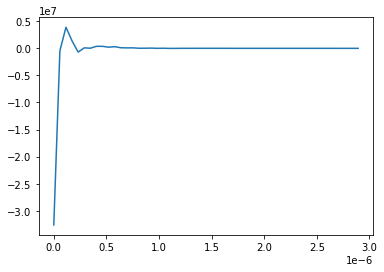

In [44]:
inertia_33=picked789.inertia_pol.isel(radius_ID=2).sel(degree=3).squeeze()
plt.plot(np.fft.rfftfreq(len(picked789.time),(picked789.time[1]-picked789.time[0]).data/(1e-5/86400)),np.fft.rfft(inertia_33))